In [ ]:
import pandas as pd

df = pd.read_csv('/content/event_log_trendify_clean.csv')

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       50000 non-null  int64  
 1   event_name    50000 non-null  object 
 2   timestamp     50000 non-null  object 
 3   device        50000 non-null  object 
 4   product_id    50000 non-null  int64  
 5   category      50000 non-null  object 
 6   price         50000 non-null  float64
 7   success_flag  50000 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 3.1+ MB


In [ ]:
df.isna().sum()

,0
user_id,0
event_name,0
timestamp,0
device,0
product_id,0
category,0
price,0
success_flag,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df['timestamp'].dtype


dtype('O')

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday


In [ ]:
df[['date','hour','weekday']].head()

,date,hour,weekday
0,2025-08-17,7,6
1,2025-08-17,7,6
2,2025-08-17,7,6
3,2025-08-17,7,6
4,2025-08-17,7,6


In [ ]:
df['event_name'].value_counts()


,count
event_name,
view_product,10193
app_open,8921
view_home,7591
add_to_cart,6003
click_category,5013
start_checkout,4893
view_cart,3953
payment_success,2391
logout,1042


In [ ]:
df['timestamp'].min(), df['timestamp'].max()


(Timestamp('2025-08-17 07:22:15.757776'),
 Timestamp('2025-11-15 07:20:43.757776'))

In [ ]:
df['device'].value_counts()


,count
device,
android,29961
ios,15018
web,5021


In [ ]:
df['category'] = df['category'].replace(["0", 0], pd.NA)


In [ ]:
df_products = df[df['product_id'].notna()]
df_products['category'].value_counts()


,count
category,
home,4791
sports,4722
electronics,4676
beauty,4667
fashion,4624


In [ ]:
event_counts = df['event_name'].value_counts()
event_counts


,count
event_name,
view_product,10193
app_open,8921
view_home,7591
add_to_cart,6003
click_category,5013
start_checkout,4893
view_cart,3953
payment_success,2391
logout,1042


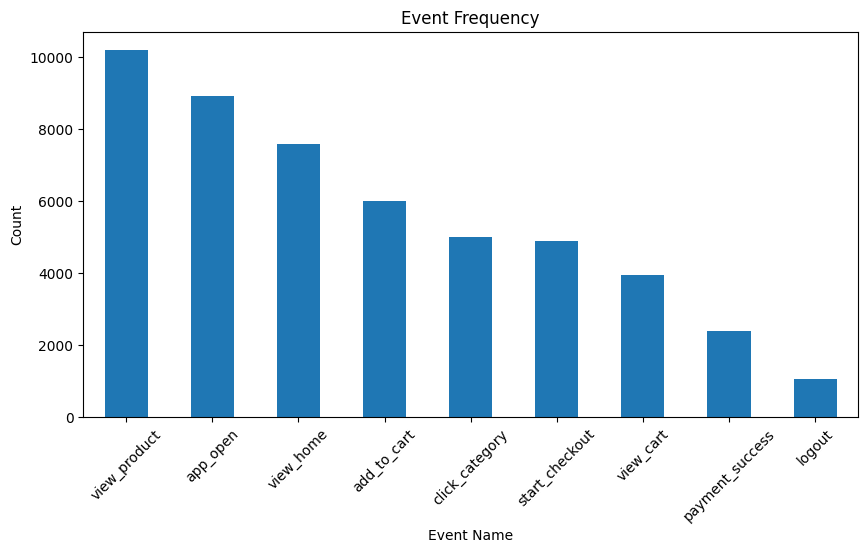

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
event_counts.plot(kind='bar')
plt.title("Event Frequency")
plt.xlabel("Event Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['device'].value_counts()

,count
device,
android,29961
ios,15018
web,5021


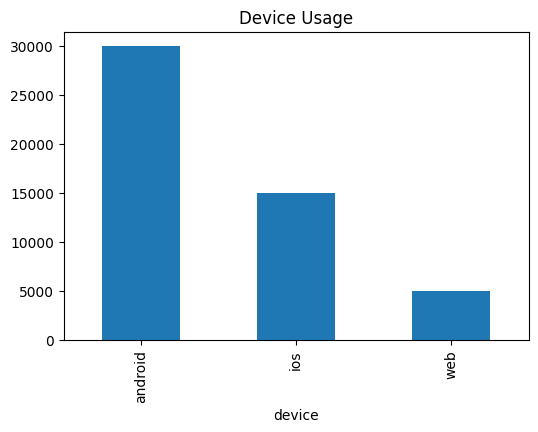

In [ ]:
df['device'].value_counts().plot(kind='bar', figsize=(6,4), title="Device Usage")
plt.show()

In [ ]:
daily_events = df.groupby('date').size()
daily_events.head()

,0
date,
2025-08-17,386
2025-08-18,555
2025-08-19,550
2025-08-20,556
2025-08-21,585


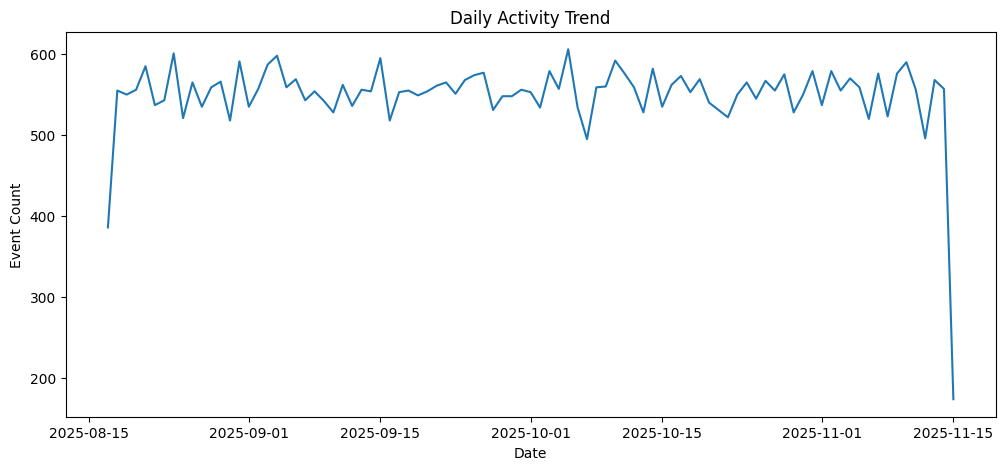

In [ ]:
daily_events.plot(figsize=(12,5), title="Daily Activity Trend")
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.show()

In [ ]:
hourly_usage = df.groupby('hour').size()
hourly_usage


,0
hour,
0,2083
1,2043
2,2059
3,2075
4,2123
5,2019
6,2019
7,2133
8,2022


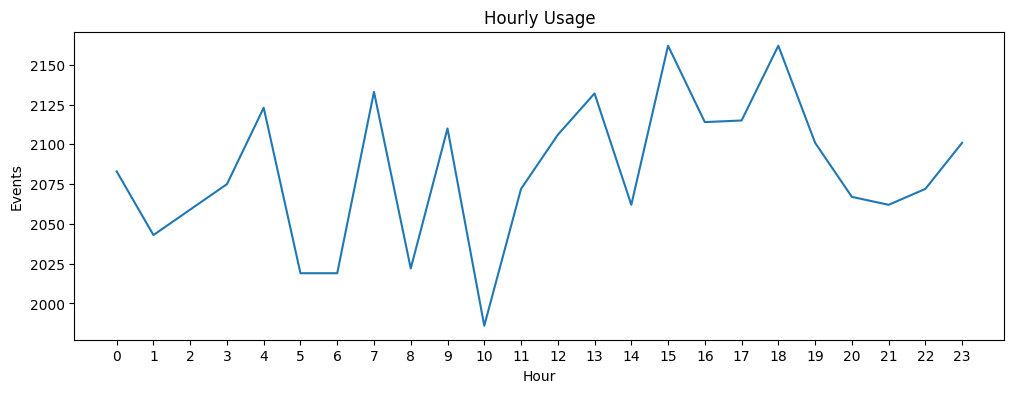

In [ ]:
hourly_usage.plot(kind='line', figsize=(12,4), title="Hourly Usage")
plt.xlabel("Hour")
plt.ylabel("Events")
plt.xticks(range(0,24))
plt.show()

In [ ]:
weekday_usage = df.groupby('weekday').size()
weekday_usage

,0
weekday,
0,7175
1,7148
2,7079
3,7277
4,7345
5,6736
6,7240


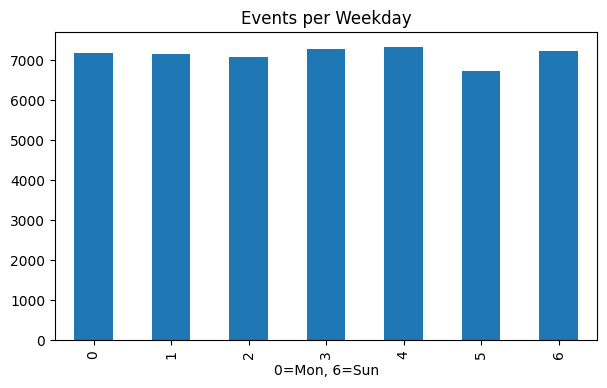

In [ ]:
weekday_usage.plot(kind='bar', figsize=(7,4), title="Events per Weekday")
plt.xlabel("0=Mon, 6=Sun")
plt.show()

In [ ]:
feature_device = df.groupby(['event_name','device']).size().unstack()
feature_device

device,android,ios,web
event_name,,,
add_to_cart,3580,1787,636
app_open,5319,2716,886
click_category,3030,1476,507
logout,629,302,111
payment_success,1420,726,245
start_checkout,2941,1489,463
view_cart,2403,1164,386
view_home,4634,2203,754
view_product,6005,3155,1033


In [ ]:
df_products = df[df['product_id'].notna()]

df_products['category'].value_counts()

,count
category,
0,26520
home,4791
sports,4722
electronics,4676
beauty,4667
fashion,4624


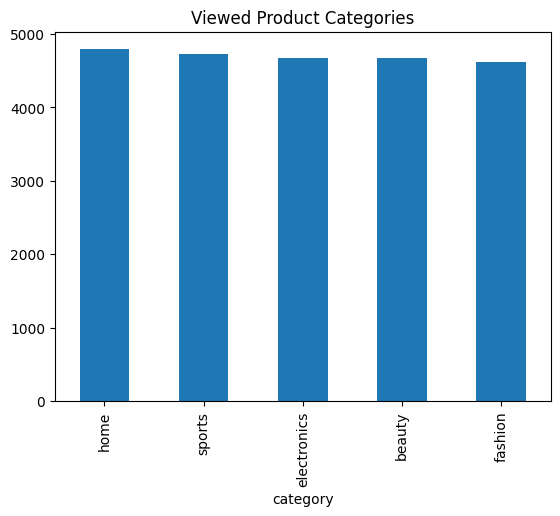

In [ ]:
df_products['category'].value_counts().plot(kind='bar', title="Viewed Product Categories")
plt.show()

In [ ]:
dau = df.groupby('date')['user_id'].nunique()
dau.head()

,user_id
date,
2025-08-17,364
2025-08-18,519
2025-08-19,522
2025-08-20,522
2025-08-21,555


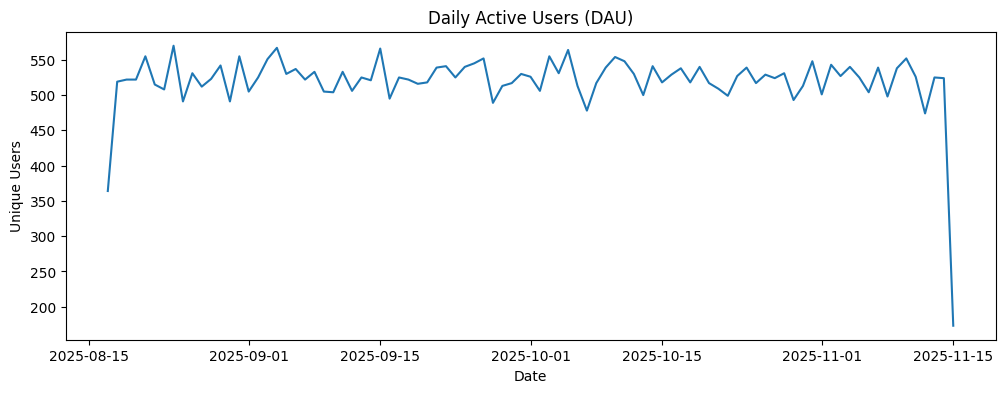

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
dau.plot()
plt.title("Daily Active Users (DAU)")
plt.xlabel("Date")
plt.ylabel("Unique Users")
plt.show()


In [ ]:
df['week'] = df['timestamp'].dt.isocalendar().week

wau = df.groupby('week')['user_id'].nunique()
wau

,user_id
week,
33,364
34,2709
35,2650
36,2737
37,2648
38,2678
39,2752
40,2718
41,2713


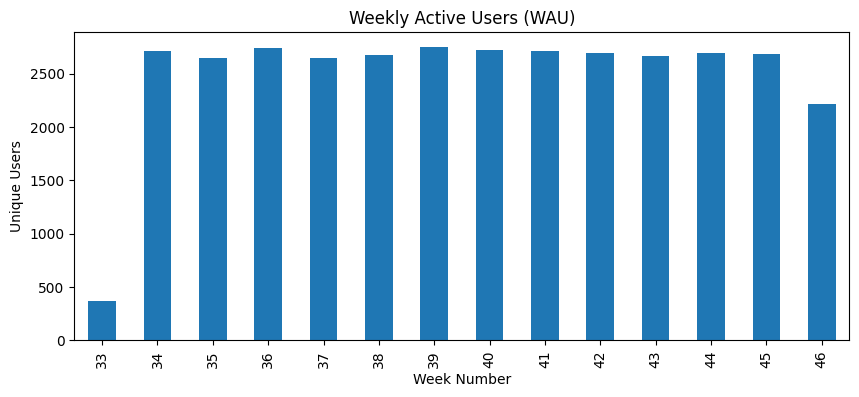

In [ ]:
plt.figure(figsize=(10,4))
wau.plot(kind='bar')
plt.title("Weekly Active Users (WAU)")
plt.xlabel("Week Number")
plt.ylabel("Unique Users")
plt.show()

In [ ]:
daily_events = df.groupby('date').size()
daily_events

,0
date,
2025-08-17,386
2025-08-18,555
2025-08-19,550
2025-08-20,556
2025-08-21,585
...,...
2025-11-11,556
2025-11-12,496
2025-11-13,568


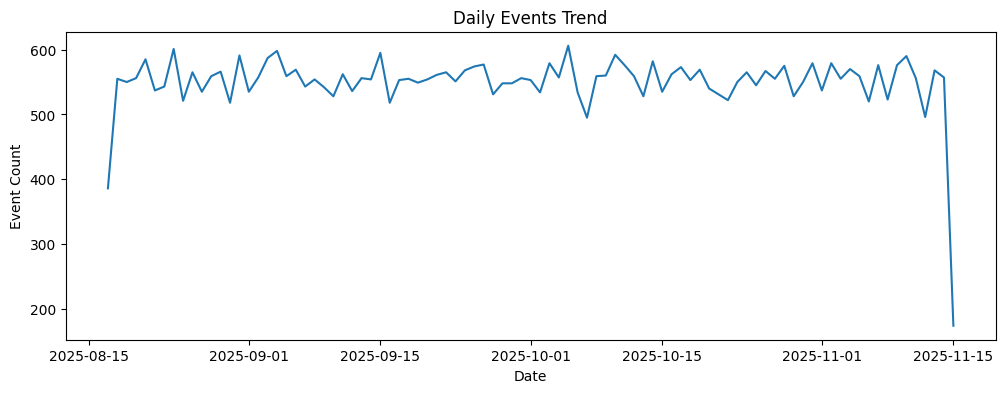

In [ ]:
plt.figure(figsize=(12,4))
daily_events.plot()
plt.title("Daily Events Trend")
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.show()

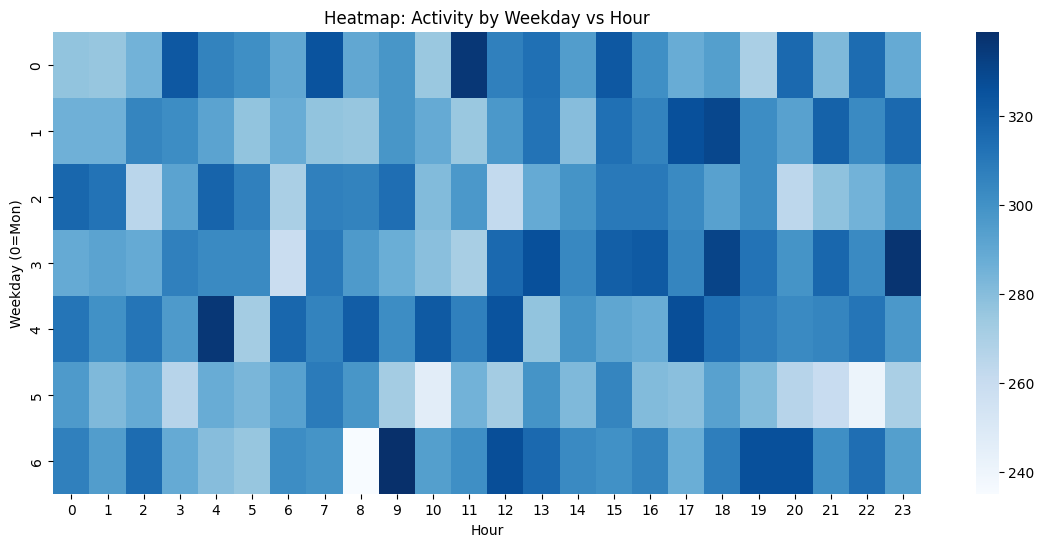

In [ ]:
import seaborn as sns
import numpy as np

heatmap_data = df.groupby(['weekday','hour']).size().unstack()

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title("Heatmap: Activity by Weekday vs Hour")
plt.xlabel("Hour")
plt.ylabel("Weekday (0=Mon)")
plt.show()

In [ ]:
daily_df = daily_events.reset_index()
daily_df.columns = ['date','events']

mean = daily_df['events'].mean()
std = daily_df['events'].std()

daily_df['z_score'] = (daily_df['events'] - mean) / std
daily_df.sort_values('z_score')

,date,events,z_score
90,2025-11-15,174,-7.703389
0,2025-08-17,386,-3.353632
51,2025-10-07,495,-1.117201
87,2025-11-12,496,-1.096683
30,2025-09-16,518,-0.645294
...,...,...,...
54,2025-10-10,592,0.873018
29,2025-09-15,595,0.934571
18,2025-09-04,598,0.996124
7,2025-08-24,601,1.057677
